# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?

A model is linear when the relationship between the independent and dependent variables can be represented by a straight line. Linear as in pertaining to a uniform increase or decrease in the dependent variable as the independent variable increases.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

The coefficient for a dummy (one-hot-encoded) variable represents the difference in the dependent variable between the category it represents and the baseline (omitted) category, assuming the model includes an intercept. If the intercept is removed, the interpretation changes because each dummy coefficient then represents the absolute predicted value for that category rather than a difference from a baseline.

3. Can linear regression be used for classification? Explain why, or why not.

Linear regression is not ideal for classification because it predicts continuous values rather than discrete class labels. While you could set a threshold (i.e. predict class 1 if the output is above 0.5), this approach doesn't handle probabilities well and is sensitive to outliers. Logistic regression or other classification models are better because they map predictions to a probability range (0 to 1) and are specifically designed for categorical outcomes.

4. What are signs that your linear model is over-fitting?

Signs of overfitting in a linear model include a very high R^2 on the training data but poor performance on test data, meaning the model captures noise rather than general patterns. Large coefficients can also be a red flag, as they suggest the model is too sensitive to small variations in the data. Additionally, if adding more features significantly improves training accuracy but not test accuracy, the model is likely overfitting.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multicollinearity happens when two or more independent variables in a regression model are highly correlated, making it hard to tell which variable is actually affecting the dependent variable. This can make coefficient estimates unstable and unreliable. During the first stage of the two-stage least squares technique, you find a new variable (called an instrument) that is related to the problematic independent variable but not to the error term. Then, use this instrument to predict the problematic variable. In the second stage, predicted values are used from the first stage instead of the original problematic variable in the main regression. Since the new values are not affected by the error term, the estimates become more reliable.

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable  𝑦  and your features/control/response/independent variables  𝑥  into your analysis?

To handle nonlinear relationships between the dependent variable
y and independent variables
x, you can modify your model in several ways. One option is to add polynomial terms, like
x^
2
or x^
3
 , to capture curves in the data. Another is to use log transformations on
x or
y
y to model exponential relationships. Interaction terms (
x_1
×
x_2
​
 ) can help if variables influence each other. More flexible approaches include using splines, which allow different patterns in different ranges of
x, or tree-based models like decision trees and random forests, which automatically detect complex relationships. Choosing the right method depends on how much complexity your model needs while keeping it understandable.

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept in a regression model represents the predicted value of the dependent variable (y) when all independent variables (x) are zero. However, its interpretation only makes sense if zero is a meaningful value for all predictors. A slope coefficient for a variable shows how much the dependent variable changes for a one-unit increase in that independent variable, assuming all other variables are held constant. The coefficient for a dummy (one-hot-encoded) variable represents the difference in the dependent variable between the category it represents and the baseline (omitted) category. If the model includes an intercept, the coefficient tells how much the predicted value changes when that category is present, compared to the baseline.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [9]:
import requests
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

link = "https://raw.githubusercontent.com/deancuva/linearModels/refs/heads/main/assignment/data/Q1_clean.csv"
df = pd.read_csv(link)
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


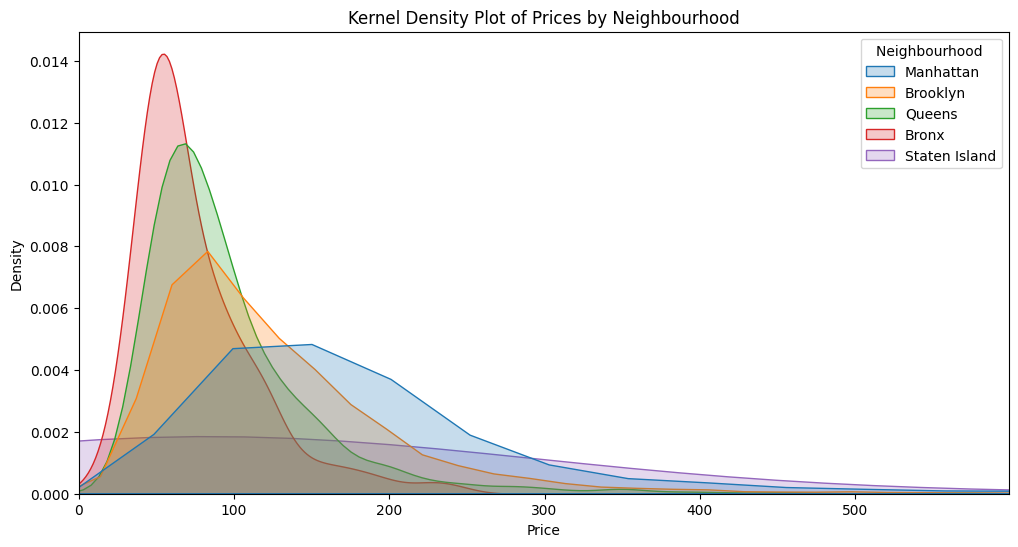

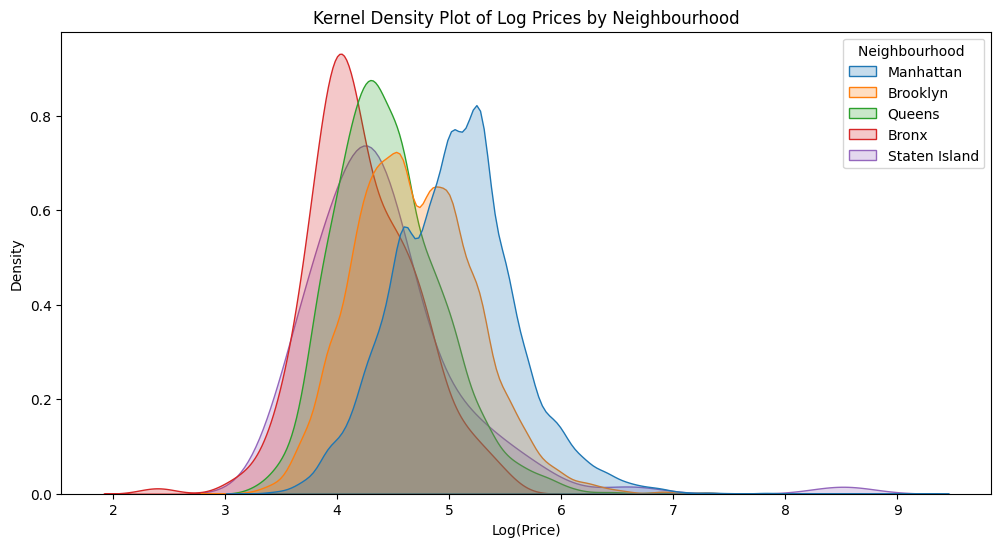

In [13]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="Price", hue="Neighbourhood ", fill=True, common_norm=False)
plt.title("Kernel Density Plot of Prices by Neighbourhood")
plt.xlabel("Price")
plt.ylabel("Density")
plt.xlim(0, df["Price"].quantile(0.99))
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=np.log1p(df["Price"]), hue="Neighbourhood ", fill=True, common_norm=False)
plt.title("Kernel Density Plot of Log Prices by Neighbourhood")
plt.xlabel("Log(Price)")
plt.ylabel("Density")
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [12]:
avg_price_by_neighbourhood = df.groupby("Neighbourhood ")["Price"].mean().reset_index()
avg_price_by_neighbourhood = avg_price_by_neighbourhood.sort_values(by="Price", ascending=False)
print("Average Prices by Neighbourhood:\n", avg_price_by_neighbourhood)

X = pd.get_dummies(df["Neighbourhood "], drop_first=False)
y = df["Price"]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

coefficients = pd.DataFrame({"Neighbourhood": X.columns, "Coefficient": model.coef_})
print("\nRegression Coefficients (No Intercept):\n", coefficients)


Average Prices by Neighbourhood:
   Neighbourhood        Price
2      Manhattan  183.664286
4  Staten Island  146.166667
1       Brooklyn  127.747378
3         Queens   96.857233
0          Bronx   75.276498

Regression Coefficients (No Intercept):
    Neighbourhood  Coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


Looking at the regression results, the coefficients in the no-intercept model match exactly with the average prices by Neighbourhood from part 1. This makes sense because, in the no-intercept model, each borough gets its own coefficient, which represents the mean price directly. In contrast, the intercept model selects one borough (for instance, the Bronx if it was dropped) as the baseline. The intercept in this model represents the average price of the omitted category (the Bronx), and the coefficients for other boroughs represent the difference in average price compared to the Bronx.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [15]:
X_with_intercept = pd.get_dummies(df["Neighbourhood "], drop_first=True)  # Drop first category to avoid multicollinearity
y = df["Price"]

model_with_intercept = LinearRegression(fit_intercept=True)
model_with_intercept.fit(X_with_intercept, y)

coefficients_with_intercept = pd.DataFrame(
    {"Neighbourhood ": ["Intercept"] + list(X_with_intercept.columns),
     "Coefficient": [model_with_intercept.intercept_] + list(model_with_intercept.coef_)}
)

print("\nRegression Coefficients (With Intercept):\n", coefficients_with_intercept)



Regression Coefficients (With Intercept):
   Neighbourhood   Coefficient
0      Intercept    75.276498
1       Brooklyn    52.470881
2      Manhattan   108.387789
3         Queens    21.580735
4  Staten Island    70.890169


By removing one category, I'm able to avoid perfect multicollinearity (otherwise known dummy variable trap). The removed category acts as the baseline, and all other coefficients represent the difference in price from this baseline. The intercept represents the average price for the omitted category (the borough that was dropped) and each coefficient represents how much more or less expensive that borough is compared to the omitted category. n part 2 (no intercept), each coefficient directly represented the mean price for that borough.

Here, to get those values, you add the intercept to each coefficient. That is:
Coefficient from Part 2= Intercept + Coefficient from this model.

This works because in part 2, each borough had its own separate coefficient, but here, they are expressed relative to the baseline borough.

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [21]:
df_clean = df.dropna(subset=["Price", "Review Scores Rating", "Neighbourhood ", "Property Type"])

X = df_clean[["Review Scores Rating"]].join(pd.get_dummies(df_clean["Neighbourhood "], drop_first=True))
y = df_clean["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

review_score_coefficient = model.coef_[0]

most_expensive_property = df_clean.groupby("Property Type")["Price"].mean().idxmax()

print(f"R² on Test Set: {r2:.4f}")
print(f"RMSE on Test Set: {rmse:.4f}")
print(f"Coefficient on Review Scores Rating: {review_score_coefficient:.4f}")
print(f"Most Expensive Property Type: {most_expensive_property}")

R² on Test Set: 0.0459
RMSE on Test Set: 140.9182
Coefficient on Review Scores Rating: 1.2119
Most Expensive Property Type: Condominium


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [23]:
df_clean = df.dropna(subset=["Price", "Review Scores Rating", "Neighbourhood ", "Property Type"])

X = df_clean[["Review Scores Rating"]].join(
    pd.get_dummies(df_clean[["Neighbourhood ", "Property Type"]], drop_first=True)
)
y = df_clean["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

review_score_coefficient = model.coef_[0]

most_expensive_property = df_clean.groupby("Property Type")["Price"].mean().idxmax()

print(f"R² on Test Set: {r2:.4f}")
print(f"RMSE on Test Set: {rmse:.4f}")
print(f"Coefficient on Review Scores Rating: {review_score_coefficient:.4f}")
print(f"Most Expensive Property Type: {most_expensive_property}")


R² on Test Set: 0.0542
RMSE on Test Set: 140.3027
Coefficient on Review Scores Rating: 1.2010
Most Expensive Property Type: Condominium


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

The change in the coefficient on Review Scores Rating from 1.2119 (without Property Type) to 1.2010 (with Property Type) happens because in multiple regression, each coefficient represents the effect of an independent variable on the dependent variable while holding all other variables constant. When Property Type is not included, the coefficient on Review Scores Rating captures both its effect and any influence that Property Type might have had on price, since property types could be correlated with both Review Scores and Price.

When Property Type is included, the model accounts for differences in price across property types separately. This means the coefficient on Review Scores Rating now reflects only its direct effect on price, without capturing indirect effects due to variations in property type. The slight decrease suggests that some of the relationship between Review Scores and Price was actually due to differences in property type—meaning higher-rated properties might also tend to be of a more expensive type, like condominiums.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will  𝑏∗  be large or small, depending on the relationship between  𝑋  and  𝑌  and the variance of  𝑋 ?

The slope coefficient b* in a simple linear regression model depends on both the relationship between X and Y and the variance of X. If X and Y are strongly correlated, the numerator of the formula, which captures how changes in X align with changes in Y, will be large, leading to a higher b*. Conversely, if the correlation is weak, the numerator will be small, resulting in a lower b*. The variance of X, which appears in the denominator, also plays a key role. When the variance of X is large, the denominator increases, making b* smaller. On the other hand, if the variance of X is small, even slight changes in X can lead to significant changes in Y, making b* larger. In summary, b* is large when X and Y are strongly correlated and the variance of X is low, while it is small when the correlation is weak or the variance of X is high.

2. Suppose you have measurement error in  𝑋  which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of  𝑋  for observation  𝑖  is  𝑧𝑖 , but we observe  𝑥𝑖=𝑧𝑖+𝑛𝑖 , where  𝑛𝑖  is the added noise. Does this affect the intercept of the regression? What happens to the  𝑏∗  coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called attenuation.)

When there is measurement error in X, meaning we observe  x_i = z_i + n_i instead of the true value z_i, it introduces attenuation bias, which distorts the regression results. The intercept may shift, but the main effect is on the slope coefficient. The estimated slope b* will be biased toward zero because the added noise inflates the variance of X, making the relationship between X and Y appear weaker than it actually is. This weaker slope means the model underestimates the effect of X on Y, reducing its predictive accuracy. As a result, predictions will be less responsive to changes in X and will have higher errors, especially when the measurement error is large. This phenomenon, known as attenuation bias, leads to a model that still functions but is less reliable in capturing the true relationship between X and Y.

3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

The intuition behind this result is that if the noise n_i is independent of both the true values z_i and the dependent variable y_i, and its mean is zero, then the added noise does not systematically distort the relationship between X and Y. Since the noise is random and averages out to zero, it does not introduce bias in the expected value of the regression coefficients. However, while the mean of the estimates remains correct, the presence of measurement error still inflates the variance of X, leading to attenuation bias, where the estimated slope b* is biased toward zero. This means that although the regression does not systematically over- or underestimate the true relationship, it underestimates the strength of the relationship between X and Y, making predictions less sensitive to changes in X. Essentially, the model still works, but it becomes weaker in detecting real effects.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

Attenuation bias weakens the estimated relationship between X and Y, meaning that poor data quality can lead to underestimating the true effects of variables.

On the cost side, improving data quality (whether through better measurement tools, more careful data collection, or extensive cleaning) requires additional time, money, and resources. In some cases, perfect data collection may be infeasible or too expensive relative to the expected gains.

On the benefit side, reducing measurement error minimizes attenuation bias, leading to more accurate estimates of relationships between variables. This is particularly important in fields where decision-making relies on precise estimates, such as finance, medicine, and policy. Higher-quality data also improves predictive power, reduces uncertainty, and increases confidence in the model’s insights.

Ultimately, the decision to invest in better data depends on how much accuracy is required for the model’s purpose. If small biases have significant consequences, such as in medical trials or financial forecasting, then investing in higher-quality data is crucial. However, if the model is used for exploratory analysis or rough estimates, the cost of perfect data cleaning may not be justified.